In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.shape

(167, 10)

In [4]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


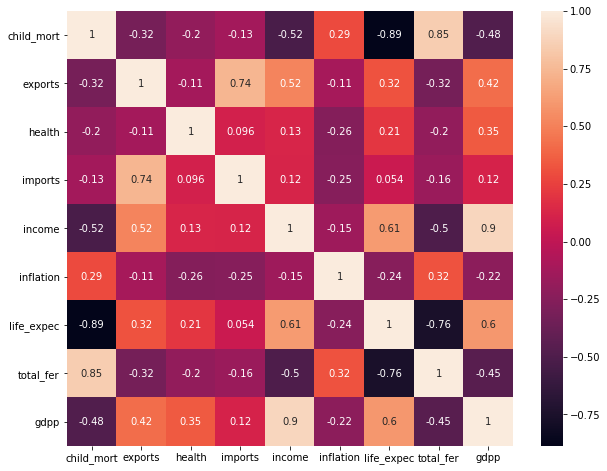

In [6]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)


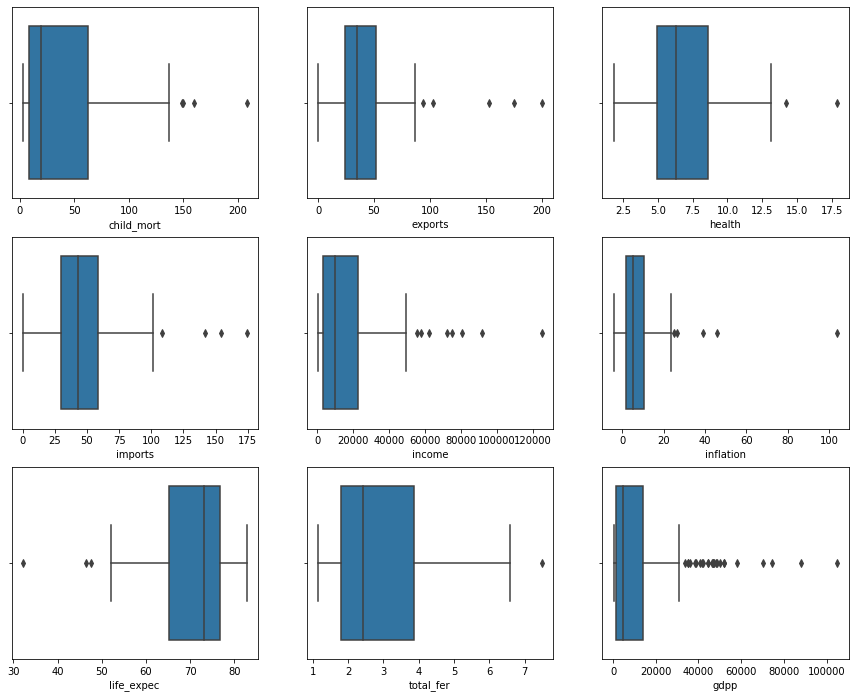

In [7]:
#Checking for outliers

feature = df.columns[1:]

plt.figure(figsize = (15,12))

for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

In [8]:
# capping

q1 = df['child_mort'].quantile(0.01)
df['child_mort'][df['child_mort'] <= q1] =q1

q4 = df['exports'].quantile(0.99)
df['exports'][df['exports']>= q4] = q4

q4 = df['health'].quantile(0.99)
df['health'][df['health']>= q4] = q4

q4 = df['imports'].quantile(0.99)
df['imports'][df['imports']>= q4] = q4

q4 = df['income'].quantile(0.99)
df['income'][df['income']>= q4] = q4

q4 = df['inflation'].quantile(0.99)
df['inflation'][df['inflation']>= q4] = q4

q4 = df['inflation'].quantile(0.99)
df['inflation'][df['inflation']>= q4] = q4

q4 = df['life_expec'].quantile(0.99)
df['life_expec'][df['life_expec']>= q4] = q4

q4 = df['total_fer'].quantile(0.99)
df['total_fer'][df['total_fer']>= q4] = q4

q4 = df['gdpp'].quantile(0.99)
df['gdpp'][df['gdpp']>= q4] = q4


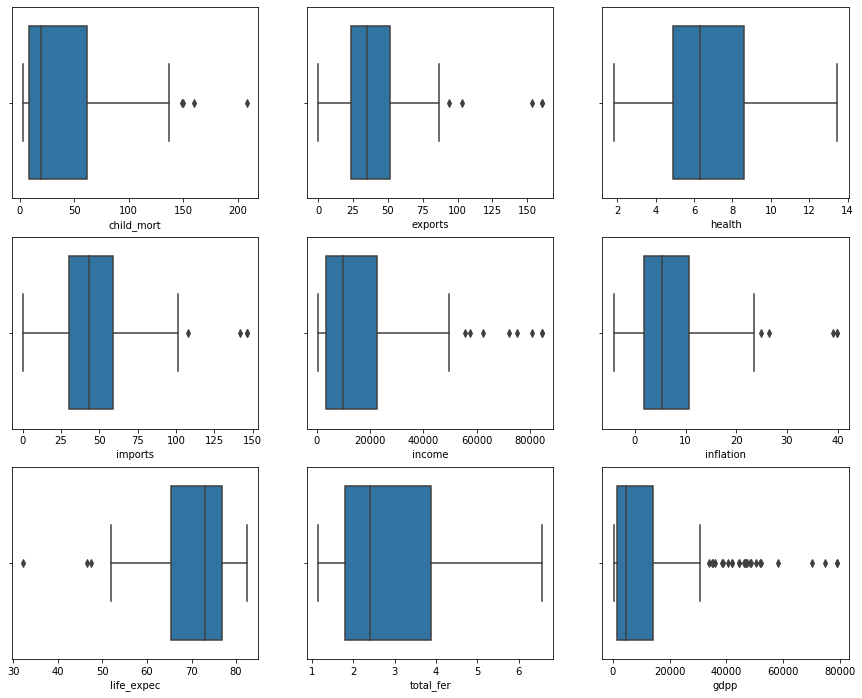

In [9]:
#after capping
feature = df.columns[1:]

plt.figure(figsize = (15,12))

for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]])

In [10]:
#clustering

In [11]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [12]:
hopkins(df.drop('country', axis=1))

0.9412054980961294

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153663, -1.19927911,  0.30123858, ..., -1.61970522,
         1.92639646, -0.70225949],
       [-0.53899289, -0.49806893, -0.08896601, ...,  0.64883094,
        -0.86505432, -0.49872564],
       [-0.27286971, -0.09292528, -0.99060381, ...,  0.67140344,
        -0.03498262, -0.47743428],
       ...,
       [-0.37235501,  1.21600038,  0.02089742, ...,  0.28767096,
        -0.66423052, -0.65869853],
       [ 0.44839871, -0.42015669, -0.60797601, ..., -0.34435902,
         1.15657191, -0.65869853],
       [ 1.11495022, -0.14746385, -0.33900002, ..., -2.09372771,
         1.64524315, -0.6500669 ]])

In [14]:
df1 = pd.DataFrame(df1, columns=df.columns[1:])
df1

df2= pd.DataFrame()
df2['child_mort']=df1['child_mort']
df2['income']=df1['income']
df2['gdpp']=df1['gdpp']
df2.head()

df1=df2

In [15]:
## K-Mean Clustering

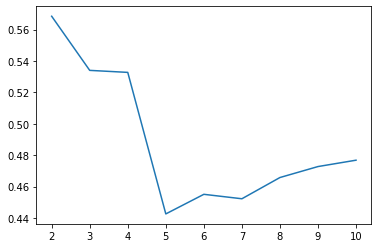

In [16]:
# Choose the value of K
# Silhouette score
# Elbow curve-ssd

from sklearn.metrics import silhouette_score
ss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])
temp = pd.DataFrame(ss)    
plt.plot(temp[0], temp[1])

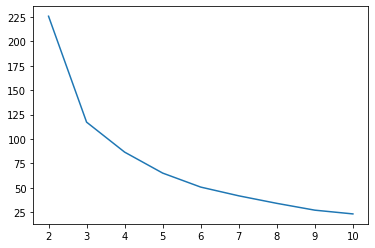

In [17]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1])

In [18]:
kmean = KMeans(n_clusters = 3, random_state = 50)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [19]:
df_kmean = df.copy()

In [20]:
label  = pd.DataFrame(kmean.labels_, columns= ['label'])
label.head()

,label
0,2
1,0
2,0
3,2
4,0


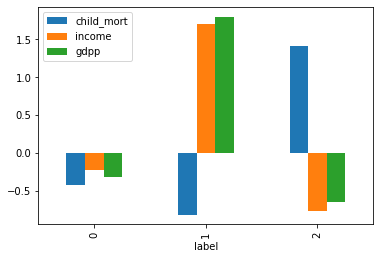

In [21]:
#plot on scalled data

df1 = pd.concat([df1, label], axis =1)
df1.head()

df1.groupby('label').mean().plot(kind = 'bar')


In [22]:
df_kmean = pd.concat([df_kmean, label], axis =1)
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


In [23]:
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


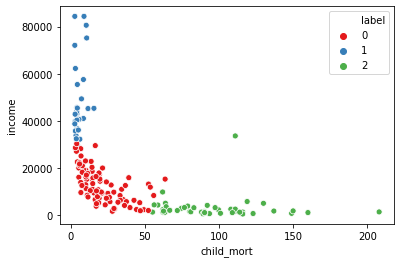

In [24]:
# Plot the cluster

# plt.figure(figsize = (10,8))

sns.scatterplot(x = 'child_mort', y = 'income', hue = 'label', data = df_kmean, palette = 'Set1')

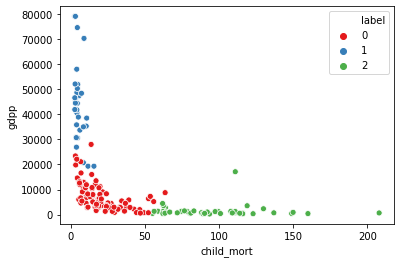

In [25]:
# plt.figure(figsize = (10,8))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

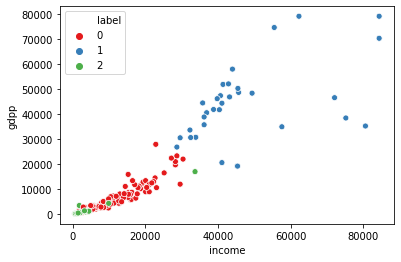

In [26]:
# plt.figure(figsize = (10,8))

sns.scatterplot(x = 'income', y = 'gdpp', hue = 'label', data = df_kmean, palette = 'Set1')

In [27]:
#cluster profiling

In [28]:
df_kmean.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0


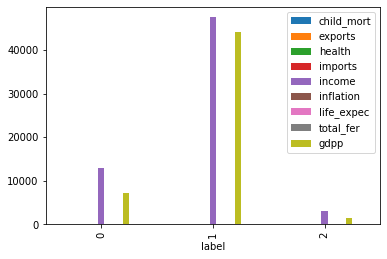

In [29]:
# Making sense out of the clsuters
df_kmean.drop('country', axis = 1).groupby('label').mean().plot(kind = 'bar')

In [30]:
df_kmean.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'label'],
      dtype='object')

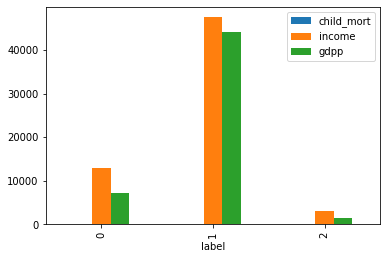

In [31]:
df_kmean.drop(['country', 'exports', 'exports', 'imports',
               'inflation', 'life_expec', 'total_fer', 'health'], axis = 1).groupby('label').mean().plot(kind = 'bar')

In [32]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter -- here it is cluster number 2

df_kmean[df_kmean['label'] == 2].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
0,Afghanistan,90.2,10.00,7.58,44.9,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,62.30,2.85,42.9,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,23.80,4.10,37.2,1820.0,0.885,61.8,5.36,758.0,2
25,Burkina Faso,116.0,19.20,6.74,29.6,1430.0,6.810,57.9,5.87,575.0,2
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.300,57.7,6.26,231.0,2


In [33]:
df_kmean[df_kmean['label'] == 2].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.5400,334.0,2
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.0200,327.0,2
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.2600,231.0,2
112,Niger,123.0,22.20,5.16,49.1,814.0,2.55,58.8,6.5636,348.0,2
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.01,47.5,5.2100,446.0,2


In [34]:
## Hierarchical clustering

In [35]:
df1_scaled=df1
df_grouped=df_kmean

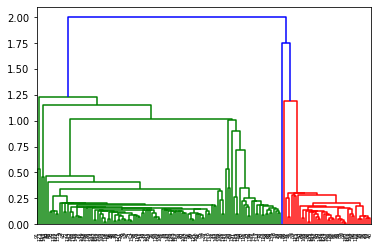

In [36]:
#single linkage
mergings=linkage(df1_scaled, method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

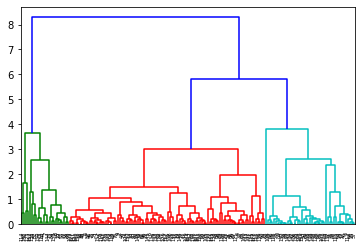

In [37]:
#complete linkage
mergings=linkage(df1_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

In [38]:
#3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )

In [39]:
df_grouped['cluster_labels'] = cluster_labels
df_grouped.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,2,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0,1
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0,1


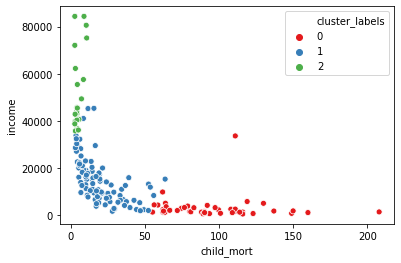

In [40]:
#plotting the groups
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'cluster_labels', data = df_grouped, palette = 'Set1')

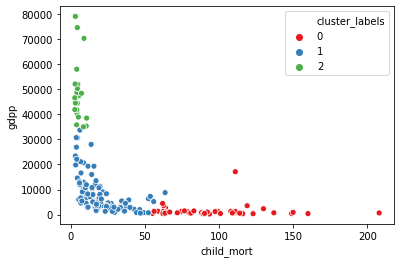

In [41]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'cluster_labels', data = df_grouped, palette = 'Set1')

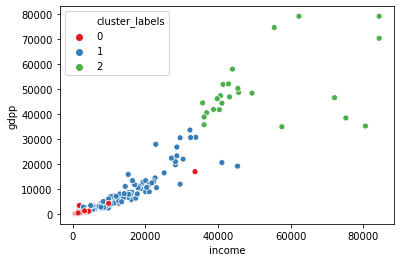

In [42]:
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'cluster_labels', data = df_grouped, palette = 'Set1')

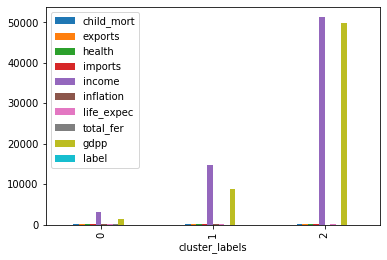

In [43]:
# Making sense out of the clsuters 
df_grouped.groupby('cluster_labels').mean().plot(kind = 'bar')

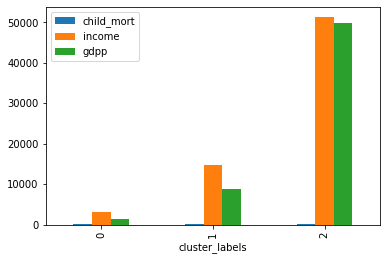

In [44]:
df_kmean.drop(['country', 'exports', 'exports', 'imports',
               'inflation', 'life_expec', 'total_fer', 'health', 'label'], axis = 1).groupby('cluster_labels').mean().plot(kind = 'bar')

In [45]:
# Low income, Low GDP and High Child_mort
# Filter the data for that clsuter -- here it is cluster number 0

df_grouped[df_grouped['label'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,0,1
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,0,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,0,1
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0,0,1
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220.0,0,1


In [46]:
df_grouped[df_grouped['cluster_labels'] == 0].sort_values(by = ['income', 'gdpp', 'child_mort'], ascending = [True, True, False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,label,cluster_labels
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609.0,20.80,57.5,6.5400,334.0,2,0
88,Liberia,89.3,19.10,11.80,92.6,700.0,5.47,60.8,5.0200,327.0,2,0
26,Burundi,93.6,8.92,11.60,39.2,764.0,12.30,57.7,6.2600,231.0,2,0
112,Niger,123.0,22.20,5.16,49.1,814.0,2.55,58.8,6.5636,348.0,2,0
31,Central African Republic,149.0,11.80,3.98,26.5,888.0,2.01,47.5,5.2100,446.0,2,0


In [47]:
# It is clearly visible that from k-means and herarchical clustering, below countries are in direst need of aid -
#               (1)'Congo, Dem. Rep.'
#               (2)'Liberia'
#               (3)'Burundi'
#               (4)'Niger'
#               (5)'Central African Republic'